Step # 1

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
cd  /content/drive/MyDrive/ASSIGNMENT # 4/flowers

/content/drive/MyDrive/ASSIGNMENT # 4/flowers


Step # 2

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt

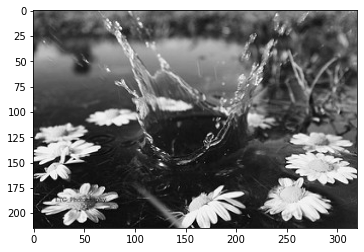

In [37]:
DATADIR= '/content/drive/MyDrive/ASSIGNMENT # 4/flowers'
CATEGORIES=["daisy" , "dandelion", "rose" , "sunflower" , "tulip" ]

for category in  CATEGORIES:
  path=os.path.join(DATADIR , category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array , cmap="gray")
    plt.show()
    break
  break

In [38]:
print(img_array)

[[132 127 129 ... 167 150 155]
 [132 123 119 ... 139 146 133]
 [128 118 112 ... 129 136 132]
 ...
 [ 19  19  19 ...  39  40  42]
 [ 19  17  16 ...  39  39  40]
 [ 17  16  15 ...  36  35  37]]


In [39]:
len(img_array)

215

In [40]:
img_array.shape

(215, 320)

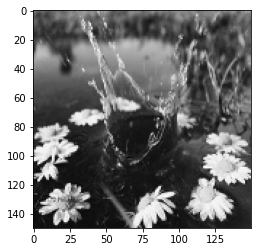

In [41]:
IMG_SIZE=150

new_array=cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
plt.imshow(new_array , cmap='gray')


In [10]:
training_data=[]

def create_training_data():
  for category in  CATEGORIES:
     path=os.path.join(DATADIR , category)
     class_num=CATEGORIES.index(category)
     for img in os.listdir(path):
        try:
          img_array=cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
          new_array=cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
          training_data.append([new_array , class_num])
        except Exception as e:
         pass
           
create_training_data()


In [11]:
print(training_data)

[[array([[129, 124, 114, ..., 170, 166, 149],
       [124, 108,  96, ..., 135, 151, 136],
       [109,  96,  82, ..., 129, 125, 124],
       ...,
       [ 20,  20,  19, ...,  39,  36,  38],
       [ 19,  18,  19, ...,  38,  40,  40],
       [ 17,  16,  19, ...,  38,  39,  37]], dtype=uint8), 0], [array([[140, 171, 192, ...,   6,   6,   4],
       [154, 191, 202, ...,  21,  17,  15],
       [168, 202, 202, ...,  55,  35,  60],
       ...,
       [ 68,  39,  37, ..., 251, 248, 241],
       [ 67,  52,  53, ..., 247, 243, 241],
       [103, 105, 121, ..., 251, 246, 248]], dtype=uint8), 0], [array([[26, 26, 26, ..., 75, 61, 68],
       [27, 26, 25, ..., 47, 58, 63],
       [26, 26, 27, ..., 53, 57, 59],
       ...,
       [13, 35, 43, ..., 23, 26, 44],
       [28, 41, 56, ..., 22, 23, 22],
       [42, 48, 59, ..., 18, 21, 21]], dtype=uint8), 0], [array([[29, 29, 30, ..., 37, 38, 35],
       [30, 32, 33, ..., 38, 37, 36],
       [35, 36, 37, ..., 37, 37, 35],
       ...,
       [ 7,  5,  6, 

In [12]:
len(training_data)

4323

In [13]:
import random

random.shuffle(training_data)

In [14]:
for sample in training_data[0:10]:
  print(sample[1])

3
0
3
2
4
1
3
3
2
2


In [15]:
x=[]
y=[]

In [16]:
for features , label in training_data:
  x.append(features)
  y.append(label)


In [17]:
X=np.array(x)
print(X.shape)

(4323, 150, 150)


In [18]:
X_1=X.reshape(4323 , 150*150)

In [19]:
X_1.shape

(4323, 22500)

In [20]:
Data=X_1.astype('float32')/255.0

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
targets = le.fit_transform(y)

In [22]:
from keras.utils import to_categorical

targets=to_categorical(targets,5)

In [23]:
targets

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
#split
from sklearn.model_selection import train_test_split

In [25]:
train_data , test_data , train_labal , test_labal=train_test_split(Data , targets , test_size=0.25 , random_state=42)

In [26]:
len(train_data)

3242

In [27]:
len(test_data)

1081

In [28]:
len(train_labal)

3242

In [29]:
len(test_labal)

1081

In [30]:
train_data.shape

(3242, 22500)

In [31]:
train_labal.shape

(3242, 5)

Model Create

In [32]:
from keras import models , layers
network=models.Sequential()
network.add(layers.Dense(512 , activation='relu' , input_shape=(150*150,)))
network.add(layers.Dense(5 , activation='softmax' ))

In [33]:
network.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [42]:
history=network.fit(train_data , train_labal , epochs=100 , batch_size=32  , validation_split=0.33)

Epoch 1/100
68/68 [==============================] - 10s 135ms/step - loss: 38.0180 - accuracy: 0.2305 - val_loss: 11.4361 - val_accuracy: 0.1785
Epoch 2/100
68/68 [==============================] - 9s 130ms/step - loss: 12.6987 - accuracy: 0.2365 - val_loss: 11.8229 - val_accuracy: 0.2421
Epoch 3/100
68/68 [==============================] - 9s 128ms/step - loss: 8.5985 - accuracy: 0.2592 - val_loss: 9.9560 - val_accuracy: 0.2664
Epoch 4/100
68/68 [==============================] - 9s 129ms/step - loss: 6.8996 - accuracy: 0.2572 - val_loss: 7.5792 - val_accuracy: 0.1776
Epoch 5/100
68/68 [==============================] - 9s 127ms/step - loss: 6.5899 - accuracy: 0.2408 - val_loss: 5.3241 - val_accuracy: 0.2841
Epoch 6/100
68/68 [==============================] - 9s 127ms/step - loss: 5.1633 - accuracy: 0.2371 - val_loss: 2.5649 - val_accuracy: 0.2935
Epoch 7/100
68/68 [==============================] - 9s 128ms/step - loss: 4.1867 - accuracy: 0.2723 - val_loss: 3.3853 - val_accuracy: 0

**GRAPHIC REPRESENTATIONS**
<br>
DESIGN GRAPH BETWEEN EPOCHS & ACCURACY 

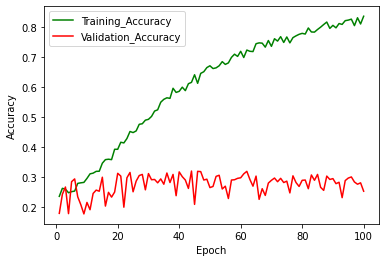

In [44]:
# PLOT GRAPG BETWEEN ACCURACY AND EPOCH
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epoch=range(1,101)
plt.plot(epoch , acc , 'g' , label='Training_Accuracy')
plt.plot(epoch , val_acc , 'r' , label='Validation_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

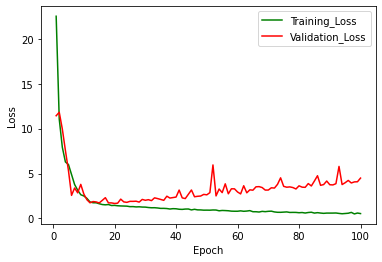

In [45]:

# PLOT GRAPG BETWEEN loss AND EPOCH
los=history.history['loss']
val_los=history.history['val_loss']
epoch=range(1,101)
plt.plot(epoch , los , 'g' , label='Training_Loss')
plt.plot(epoch , val_los , 'r' , label='Validation_Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [48]:
network.evaluate(test_data,test_labal)

34/34 [==============================] - 1s 21ms/step - loss: 3.9804 - accuracy: 0.2784


[3.9803738594055176, 0.27844586968421936]